## LIbraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from gensim import corpora, models
from gensim.models import CoherenceModel
import nltk
import pyLDAvis
import pyLDAvis.gensim_models

In [40]:
df = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')
df.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [41]:
df['Review_Text'].values[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [42]:
print(df.shape)

(42656, 6)


In [43]:
df['Rating'].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

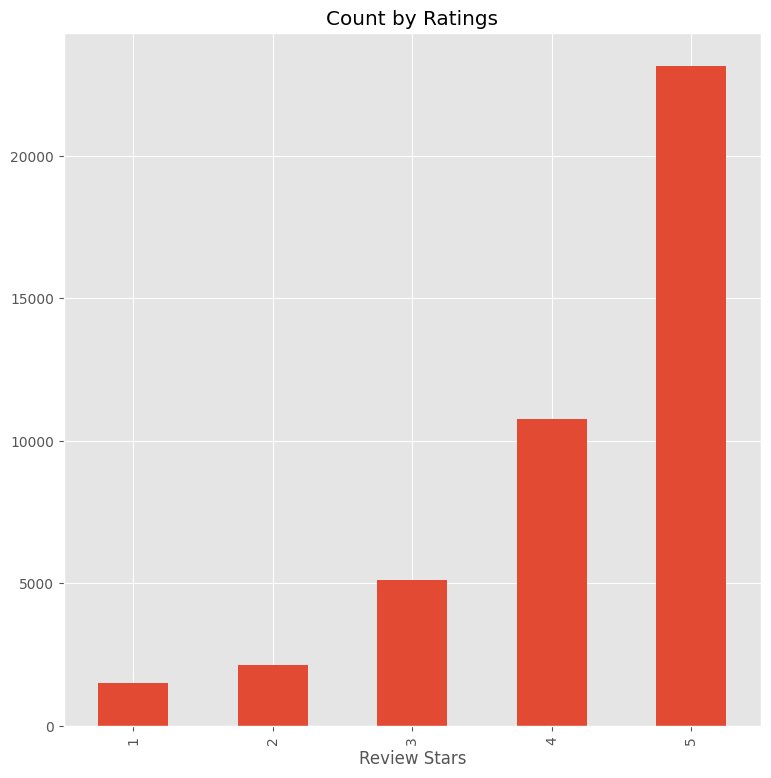

In [44]:
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar', title = 'Count by Ratings', figsize = (9,9))
ax.set_xlabel('Review Stars')
plt.show()

In [45]:
test = df['Review_Text'][0]
test

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

## Gensim

In [47]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


In [118]:
doc_sample = df['Review_Text'][0]

print('original text: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized text: ')
print(preprocess(doc_sample))

original text: 
['If', "you've", 'ever', 'been', 'to', 'Disneyland', 'anywhere', "you'll", 'find', 'Disneyland', 'Hong', 'Kong', 'very', 'similar', 'in', 'the', 'layout', 'when', 'you', 'walk', 'into', 'main', 'street!', 'It', 'has', 'a', 'very', 'familiar', 'feel.', 'One', 'of', 'the', 'rides', '', 'its', 'a', 'Small', 'World', '', 'is', 'absolutely', 'fabulous', 'and', 'worth', 'doing.', 'The', 'day', 'we', 'visited', 'was', 'fairly', 'hot', 'and', 'relatively', 'busy', 'but', 'the', 'queues', 'moved', 'fairly', 'well.', '']


 tokenized and lemmatized text: 
['disneyland', 'disneyland', 'hong', 'kong', 'similar', 'layout', 'walk', 'main', 'street', 'familiar', 'feel', 'rid', 'small', 'world', 'absolut', 'fabul', 'worth', 'visit', 'fair', 'relat', 'busi', 'queue', 'move', 'fair']


In [53]:
processed_text = df['Review_Text'].map(preprocess)

In [59]:
processed_text[:10]

0    [disneyland, disneyland, hong, kong, similar, ...
1    [time, visit, disneyland, time, stay, tomorrow...
2    [thank, wasn, humid, visit, park, issu, shade,...
3    [disneyland, great, compact, park, unfortun, m...
4    [locat, citi, take, hour, kowlon, kid, like, d...
5    [disney, world, disneyland, anaheim, tokyo, di...
6    [great, place, know, obvious, go, daughter, ab...
7    [think, intro, disney, magic, littl, one, attr...
8    [feel, place, disneyland, train, fantast, past...
9    [talk, disneyland, disneyland, childhood, drea...
Name: Review_Text, dtype: object

### Bag of Words

In [61]:
dictionary = gensim.corpora.Dictionary(processed_text)

In [62]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 absolut
1 busi
2 disneyland
3 fabul
4 fair
5 familiar
6 feel
7 hong
8 kong
9 layout
10 main


In [67]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text]
bow_corpus[10]

[(2, 3),
 (7, 1),
 (8, 1),
 (82, 1),
 (199, 1),
 (228, 1),
 (258, 1),
 (259, 1),
 (260, 1),
 (261, 1)]

In [68]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [73]:
dic2=dictionary[bow_doc_10[1][0]]
dic2

'hong'

In [69]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_text]
bow_corpus[10]

[(2, 3),
 (7, 1),
 (8, 1),
 (82, 1),
 (199, 1),
 (228, 1),
 (258, 1),
 (259, 1),
 (260, 1),
 (261, 1)]

In [70]:
bow_doc_10 = bow_corpus[10]

for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                                     dictionary[bow_doc_10[i][0]], 
                                                     bow_doc_10[i][1]))

Word 2 ("disneyland") appears 3 time.
Word 7 ("hong") appears 1 time.
Word 8 ("kong") appears 1 time.
Word 82 ("amaz") appears 1 time.
Word 199 ("think") appears 1 time.
Word 228 ("come") appears 1 time.
Word 258 ("ceas") appears 1 time.
Word 259 ("exhaust") appears 1 time.
Word 260 ("florida") appears 1 time.
Word 261 ("nope") appears 1 time.


### TF-IDF

In [81]:
tfidf = models.TfidfModel(bow_corpus)

In [82]:
corpus_tfidf = tfidf[bow_corpus]

In [83]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.19096433934580137),
 (1, 0.14921483669624022),
 (2, 0.09421402310012578),
 (3, 0.2607114594663935),
 (4, 0.47984150109555834),
 (5, 0.3359618991240341),
 (6, 0.15162279998528513),
 (7, 0.17682820352915318),
 (8, 0.17677767388255425),
 (9, 0.33629366157477114),
 (10, 0.14849116120893346),
 (11, 0.24315717646088447),
 (12, 0.10160296403374446),
 (13, 0.26393162280222326),
 (14, 0.04441174180596798),
 (15, 0.2538501815861146),
 (16, 0.1246416465936448),
 (17, 0.17389128041991014),
 (18, 0.07201470260251097),
 (19, 0.12425141268664784),
 (20, 0.11739508570988756),
 (21, 0.12227350237641822)]


## Visualize

In [91]:
lda_model_bow = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=4)

In [92]:
import pyLDAvis.gensim_models as gensimvis

In [93]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_bow, bow_corpus, dictionary)
vis

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.054326 -0.045451       1        1  16.935847
7      0.153602 -0.105908       2        1  13.037116
1     -0.143635  0.108241       3        1  12.960466
5     -0.141748 -0.120249       4        1  12.575768
4     -0.109694 -0.101322       5        1   9.300907
6      0.026836 -0.148826       6        1   8.366617
8     -0.004773  0.067722       7        1   8.086841
3      0.180230  0.053510       8        1   7.350536
9      0.139565  0.156372       9        1   5.990418
0     -0.154707  0.135911      10        1   5.395484, topic_info=           Term          Freq         Total Category  logprob  loglift
92         food  15691.000000  15691.000000  Default  30.0000  30.0000
459       hotel   9155.000000   9155.000000  Default  29.0000  29.0000
12        queue  18672.000000  18672.000000  Default  28.0000  28.0000
205     charact  10633.000000  10633.000000  Default  27.0000  27.0000
58     mountain   8877.000000   8877.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
75         time    871.749426  42416.092289  Topic10  -4.8223  -0.9652
119         kid    751.823485  14360.828825  Topic10  -4.9703  -0.0302
118          go    772.783474  20955.802237  Topic10  -4.9428  -0.3806
143    children    644.016660   9987.269397  Topic10  -5.1251   0.1783
2    disneyland    640.447788  27409.626775  Topic10  -5.1307  -0.8369

[777 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
350       1  0.525518   abl
350       2  0.122728   abl
350       3  0.096452   abl
350       4  0.104142   abl
350       5  0.058320   abl
...     ...       ...   ...
374       7  0.075935  year
374       8  0.002529  year
374       9  0.075724  year
374      10  0.034912  year
1221      2  0.999691  york

[2325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 2, 6, 5, 7, 9, 4, 10, 1])

## NLTK

In [94]:
df = df.head(500)

In [95]:
example = df['Review_Text'][50]
print (example)

Good to see while here, but very small. Great if we brought the children, but not for adults who have been to other ones. Not exciting for bigger children either.


In [96]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Good', 'to', 'see', 'while', 'here', ',', 'but', 'very', 'small', '.']

In [97]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('while', 'IN'),
 ('here', 'RB'),
 (',', ','),
 ('but', 'CC'),
 ('very', 'RB'),
 ('small', 'JJ'),
 ('.', '.')]

In [98]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Good/JJ)
  to/TO
  see/VB
  while/IN
  here/RB
  ,/,
  but/CC
  very/RB
  small/JJ
  ./.
  Great/JJ
  if/IN
  we/PRP
  brought/VBD
  the/DT
  children/NNS
  ,/,
  but/CC
  not/RB
  for/IN
  adults/NNS
  who/WP
  have/VBP
  been/VBN
  to/TO
  other/JJ
  ones/NNS
  ./.
  Not/RB
  exciting/VBG
  for/IN
  bigger/JJR
  children/NNS
  either/DT
  ./.)


## Vader 

In [99]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [100]:
sia.polarity_scores('I Love Danel!')

{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

In [101]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [102]:
print (example)

Good to see while here, but very small. Great if we brought the children, but not for adults who have been to other ones. Not exciting for bigger children either.


In [103]:
sia.polarity_scores(example)

{'neg': 0.089, 'neu': 0.702, 'pos': 0.208, 'compound': 0.6783}

In [104]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review_Text']
    myid = row['Review_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [105]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review_ID'})
vaders = vaders.merge(df, how='left')

In [106]:
pd.DataFrame(res).T

,neg,neu,pos,compound
670772142,0.000,0.887,0.113,0.7069
670682799,0.040,0.730,0.231,0.9901
670623270,0.024,0.742,0.235,0.9920
670607911,0.080,0.760,0.160,0.8489
670607296,0.000,0.899,0.101,0.2846
...,...,...,...,...
632538340,0.000,0.910,0.090,0.5927
632445331,0.075,0.797,0.128,0.6948
632355808,0.087,0.768,0.145,0.7636
632309460,0.065,0.620,0.315,0.8172


In [107]:
vaders.head()

,Review_ID,neg,neu,pos,compound,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,0.000,0.887,0.113,0.7069,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,0.040,0.730,0.231,0.9901,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,0.024,0.742,0.235,0.9920,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,0.080,0.760,0.160,0.8489,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,0.000,0.899,0.101,0.2846,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


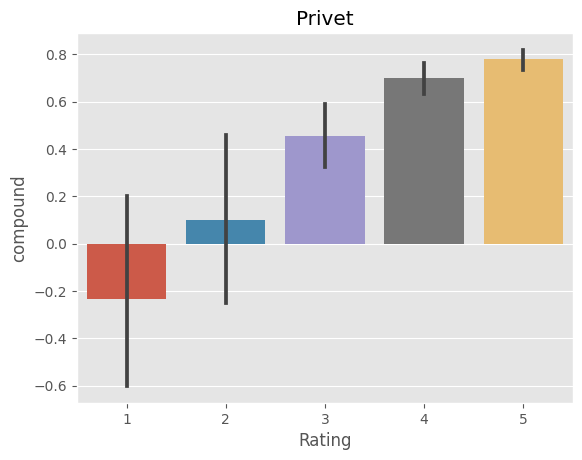

In [135]:
ax = sns.barplot(data = vaders, x= 'Rating', y = 'compound')
ax.set_title('Privet')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3 
                 


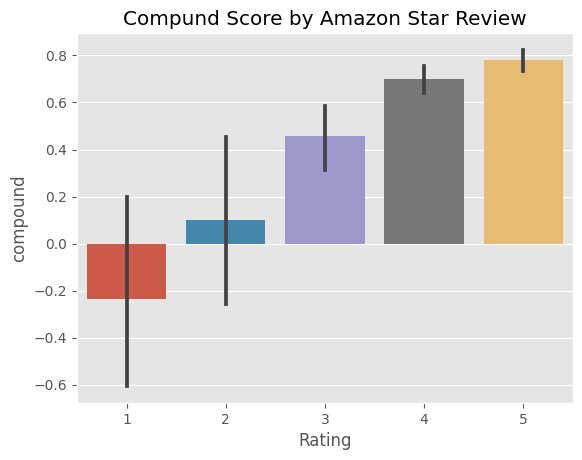

In [125]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

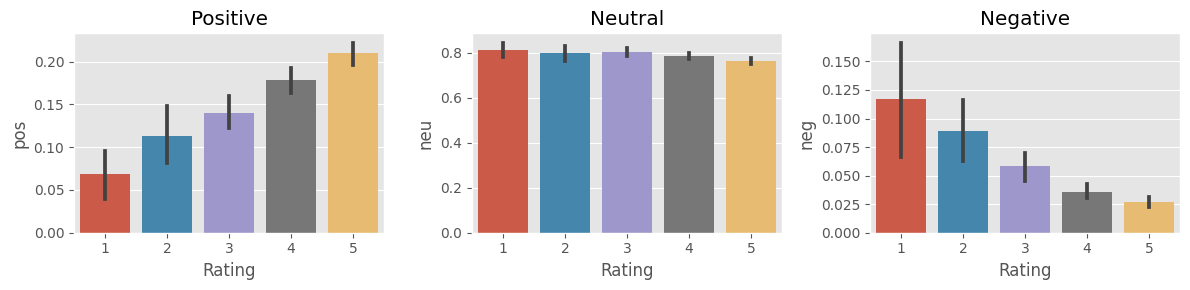

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [122]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [123]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()